<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to Classification with K-Nearest Neighbors


---

## Learning Objectives

### Core
- Understand the difference between classification and regression models
- Understand the K-Nearest Neighbors algorithm visually and in pseudocode
- Explain the differences between distance metrics and explore the two most common:
  - Euclidean distance
  - Manhattan distance
- Know how to apply KNN classification and StratifiedKFold with sklearn
- Explain what the baseline accuracy is

### Target
- Explain the effect of choosing K on the bias-variance tradeoff

<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li><li><span><a href="#Target" data-toc-modified-id="Target-1.2">Target</a></span></li></ul></li><li><span><a href="#Introduction:-regression-versus-classification" data-toc-modified-id="Introduction:-regression-versus-classification-2">Introduction: regression versus classification</a></span></li><li><span><a href="#The-KNN-algorithm" data-toc-modified-id="The-KNN-algorithm-3">The KNN algorithm</a></span><ul class="toc-item"><li><span><a href="#Note-on-parametric-versus-nonparametric-methods" data-toc-modified-id="Note-on-parametric-versus-nonparametric-methods-3.1">Note on parametric versus nonparametric methods</a></span></li></ul></li><li><span><a href="#The-KNN-distance-metric" data-toc-modified-id="The-KNN-distance-metric-4">The KNN distance metric</a></span><ul class="toc-item"><li><span><a href="#Euclidean-distance" data-toc-modified-id="Euclidean-distance-4.1">Euclidean distance</a></span></li><li><span><a href="#Manhattan-distance-(aka-Taxicab-Distance)" data-toc-modified-id="Manhattan-distance-(aka-Taxicab-Distance)-4.2">Manhattan distance (aka Taxicab Distance)</a></span></li></ul></li><li><span><a href="#Load-the-dataset" data-toc-modified-id="Load-the-dataset-5">Load the dataset</a></span><ul class="toc-item"><li><span><a href="#Rename-columns-and-subset-the-data" data-toc-modified-id="Rename-columns-and-subset-the-data-5.1">Rename columns and subset the data</a></span></li></ul></li><li><span><a href="#Examine-the-correlation-structure-of-the-dataset" data-toc-modified-id="Examine-the-correlation-structure-of-the-dataset-6">Examine the correlation structure of the dataset</a></span><ul class="toc-item"><li><span><a href="#Plot-a-heatmap-of-the-correlation-matrix" data-toc-modified-id="Plot-a-heatmap-of-the-correlation-matrix-6.1">Plot a heatmap of the correlation matrix</a></span></li><li><span><a href="#Use-seaborn's-pairplot-to-visualize-relationships-between-variables" data-toc-modified-id="Use-seaborn's-pairplot-to-visualize-relationships-between-variables-6.2">Use seaborn's pairplot to visualize relationships between variables</a></span></li></ul></li><li><span><a href="#Using-sklearn's-KNeighborsClassifier" data-toc-modified-id="Using-sklearn's-KNeighborsClassifier-7">Using sklearn's <code>KNeighborsClassifier</code></a></span><ul class="toc-item"><li><span><a href="#Create-the-target-vector" data-toc-modified-id="Create-the-target-vector-7.1">Create the target vector</a></span></li><li><span><a href="#Standardize-the-predictor-matrix" data-toc-modified-id="Standardize-the-predictor-matrix-7.2">Standardize the predictor matrix</a></span></li><li><span><a href="#Calculate-the-&quot;baseline&quot;-accuracy" data-toc-modified-id="Calculate-the-&quot;baseline&quot;-accuracy-7.3">Calculate the "baseline" accuracy</a></span></li><li><span><a href="#Instantiate-and-fit-the-kNN-model" data-toc-modified-id="Instantiate-and-fit-the-kNN-model-7.4">Instantiate and fit the kNN model</a></span></li><li><span><a href="#Predicted-labels-and-probabilities" data-toc-modified-id="Predicted-labels-and-probabilities-7.5">Predicted labels and probabilities</a></span></li><li><span><a href="#The-accuracy-score" data-toc-modified-id="The-accuracy-score-7.6">The accuracy score</a></span></li><li><span><a href="#Cross-validate-the-model" data-toc-modified-id="Cross-validate-the-model-7.7">Cross validate the model</a></span></li><li><span><a href="#Stratified-Kfold" data-toc-modified-id="Stratified-Kfold-7.8">Stratified Kfold</a></span></li><li><span><a href="#Cross-validate-the-mean-accuracy-for-a-KNN-model-with-varying-number-of-neighbors" data-toc-modified-id="Cross-validate-the-mean-accuracy-for-a-KNN-model-with-varying-number-of-neighbors-7.9">Cross-validate the mean accuracy for a KNN model with varying number of neighbors</a></span></li><li><span><a href="#How-does-increasing-the-number-of-neighbors-impact-the-bias-and-variance-of-your-model?" data-toc-modified-id="How-does-increasing-the-number-of-neighbors-impact-the-bias-and-variance-of-your-model?-7.10">How does increasing the number of neighbors impact the bias and variance of your model?</a></span></li></ul></li><li><span><a href="#Another-look-at-StratifiedKfold" data-toc-modified-id="Another-look-at-StratifiedKfold-8">Another look at <code>StratifiedKfold</code></a></span><ul class="toc-item"><li><span><a href="#Create-the-cross-validation-indices-using-StratifiedKFold" data-toc-modified-id="Create-the-cross-validation-indices-using-StratifiedKFold-8.1">Create the cross-validation indices using <code>StratifiedKFold</code></a></span></li><li><span><a href="#Write-a-function-to-manually-perform-cross-validation-using-your-stratified-indices" data-toc-modified-id="Write-a-function-to-manually-perform-cross-validation-using-your-stratified-indices-8.2">Write a function to manually perform cross-validation using your stratified indices</a></span></li></ul></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-9">Additional resources</a></span></li></ul></div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(font_scale=1.5)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Introduction: regression versus classification

We discussed the difference between continuous and discrete or categorical variables. We predicted continuous outcome variables using regression. What about discrete or categorical outcome variables?

Think back to the wine quality dataset we used in the past. We used Linear Regression to predict the quality ranging from 0-10. What if we just wanted to predict whether wine was good or bad? Red or white? 

Classification algorithms do just that; they predict categories, or classes. 

![](http://ipython-books.github.io/images/ml.png "Best Split vs Best Fit")

Our goal will be to predict as many class labels as possible correctly.
The fraction of correct predictions out of all predictions is called the **accuracy**. We would like to find a model which leads to maximal accuracy.

$$
{\rm accuracy} = 
\frac{\rm number\ of\ correct\ predictions} 
{\rm number\ of\ all\ predictions\ made}
$$

## The KNN algorithm

---

K-Nearest Neighbors takes a different approach to modeling than we have been practicing with linear models. In order to estimate a value (regression) or class membership (classification), the algorithm finds the observations in its training data that are "nearest" to the observation to predict. It then averages or takes a vote of those training observations' target values to estimate the value for the new data point.


In the picture below we have data points which belong to either the red or the blue class. For each of the data points we then determine either the 3 or 7 closest datapoints (the considered point itself is included in the counting). 

- The number of considered neighbors is the `k` in the name of the algorithm.
- The class that appears most frequently within this neighborhood is the class that we are going to predict.
- Points of which most neighbors belong to another class are not predicted correctly. In the figure below we have either two or one incorrect predictions marked by diamonds.
- There is more than one possible choice to determine which points have to be considered as closest. The circles imply using Euclidean distance (usually the default setting).
- In the example, all points contribute equally to the majority vote. This can be modified, for example by giving more weight to points which are closer to the point for which the class label should be predicted.
- In the case of ties, the predicted class will depend on the order in which observations are reported - think of 4 neighbors with a tie, then it is sufficient to know that one class is represented with 2 observations within the neighborhood and you don't have to even look at the other observations.
- Once the fit has been obtained, one can make predictions for points with unknown labels as well by relating them to the k nearest neighbors with known labels.
- The algorithm works for two and more classes.
- Today we will be looking at KNN only in the context of classification, but it can be extended to regression.

![](assets/knn_predictions.png)

**The KNN can be concisely represented with pseudocode:**

```
for unclassified_point in sample:
    for known_point in known_class_points:
        calculate distances (euclidean or other) between 
        known_point and unclassified_point
    for k in range of specified_neighbors_number:
        find k_nearest_points in known_class_points 
        to unclassified_point
    assign class to unclassified_point using "votes" 
    from k_nearest_points
```

### Note on parametric versus nonparametric methods

In **parametric** models like linear regression, we can describe our models with a few parameters. In linear regression our parameters are the coefficients in our model, and our estimate of the target is calculated from these parameters.

The KNN model is an example of a **nonparametric** model. You can see that there are no coefficients for the different predictors and our estimate is not represented by a formula of our predictor variables.

## The KNN distance metric

---
KNN typically uses one of two distance metrics: Euclidean or Manhattan. Other distance metrics are possible, but these two are the most common (sometimes it makes sense to create your own distance function).

### Euclidean distance

Recall the famous Pythagorean Theorem
![Alt text](http://ncalculators.com/images/pythagoras-theorem.gif)

We can apply the theorem to calculate distance between points. This is called Euclidean distance. 

![Alt text](http://rosalind.info/media/Euclidean_distance.png)

$$\text{Euclidean  distance}=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$$

There are many different distance metrics, but Euclidean is the most common (and default in sklearn).

### Manhattan distance (aka Taxicab Distance)

Another way to measure distance between two points is to take the sum of the absolute value of their differences. 

$$ D = \sum_{i=1}^n | x_i - y_i | $$

The name Manhattan distance comes from the fact that taxicabs in Manhattan must drive from point A to point B on streets that force traffic to flow forward or backwards and left or right -- but never diagonally. 
![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Manhattan_distance_bgiu.png/261px-Manhattan_distance_bgiu.png)
![](https://pbs.twimg.com/media/CgIlqLTWEAAedKB.jpg)

**Note that the Euclidean distance is the most common choice.**

- In practice, we can cross-validate KNN using both types of distances to see which performs best. 

![](http://www.improvedoutcomes.com/docs/WebSiteDocs/image/diagram_euclidean_manhattan_distance_metrics.gif)

> Sklearn refers to these types of metrics as "Minkowski" with parameter $p$ (i.e. the exponent, $p=1$ for Manhattan and $p=2$ for Euclidean).

$$ D = \left(\sum_{i=1}^n | x_i - y_i |^p\right)^{1/p} $$

## Load the dataset

---

Below we will be testing out the KNN classification algorithm on the classic Iris dataset.

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [7]:
y.value_counts()

2    50
1    50
0    50
dtype: int64

In [8]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Rename columns and subset the data

We read in the column names which indicate the following variables:

In [10]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

Let's customize these column names:

In [11]:
X.columns = [col.replace('(cm)', '').strip().replace(' ', '_')
             for col in X.columns]
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

## Examine the correlation structure of the dataset

---

### Plot a heatmap of the correlation matrix

Plot a seaborn heatmap of the correlation matrix to visually examine which variables are correlated and anti-correlated, and to what degree.

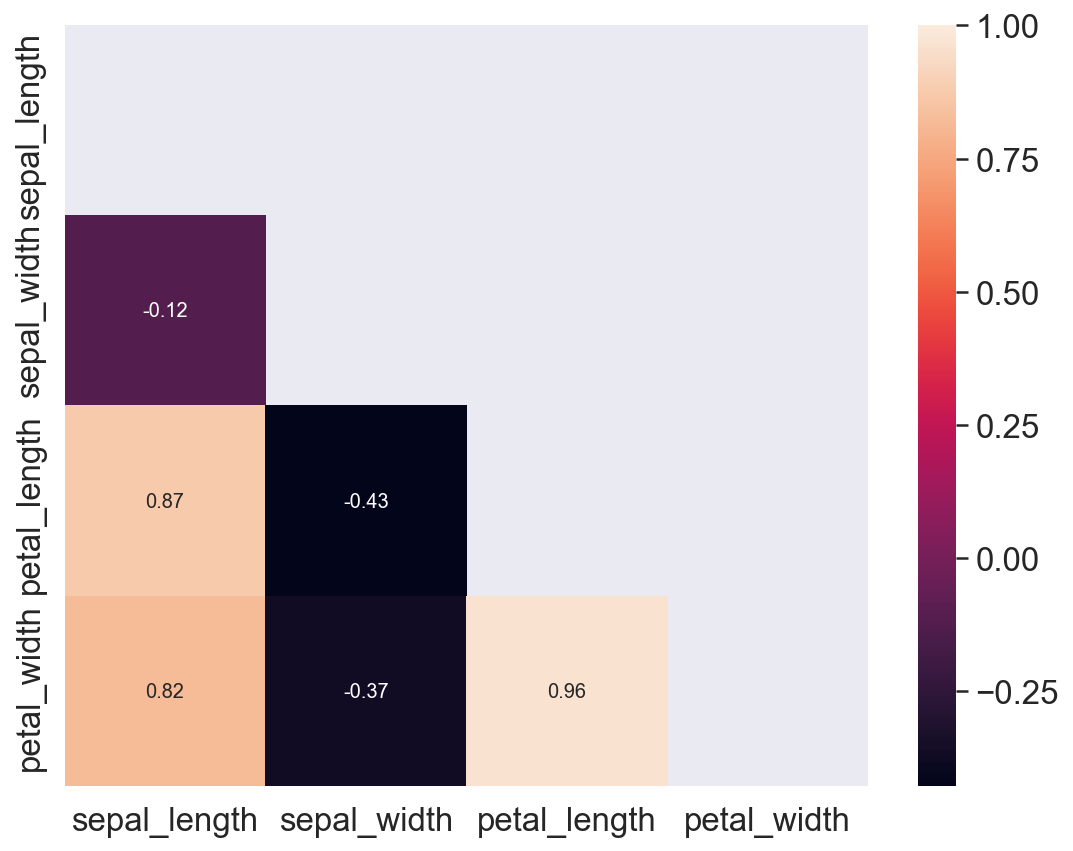

In [12]:
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(9, 7))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(X.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
sns.heatmap(X.corr(), mask=mask, annot=True, ax=ax)
ax.set_yticks(np.arange(0, X.shape[1])+0.1)
ax.set_ylim([X.shape[1], 0])
plt.show()

### Use seaborn's pairplot to visualize relationships between variables

When you have a small number of predictor variables, seaborn's `pairplot` function will give you a more detailed visual look at the relationships between variables. The pairplot is similar to a correlation matrix, but displays scatterplots of variable pairs. Along the diagonal line are histograms or kernel density estimates showing the distribution of each variable.

One of the most appealing aspects of the pairplot function for classification tasks is that the scatterplots and histograms can be split along a hue variable. If we use the target variable as the hue we are able to see how the classes are distributed across these variables as well.

Plot data using seaborn's `pairplot()` function. The hue will be the target variable. The variables will be the other columns. This function can take some time to run.

In [13]:
X['iris'] = y

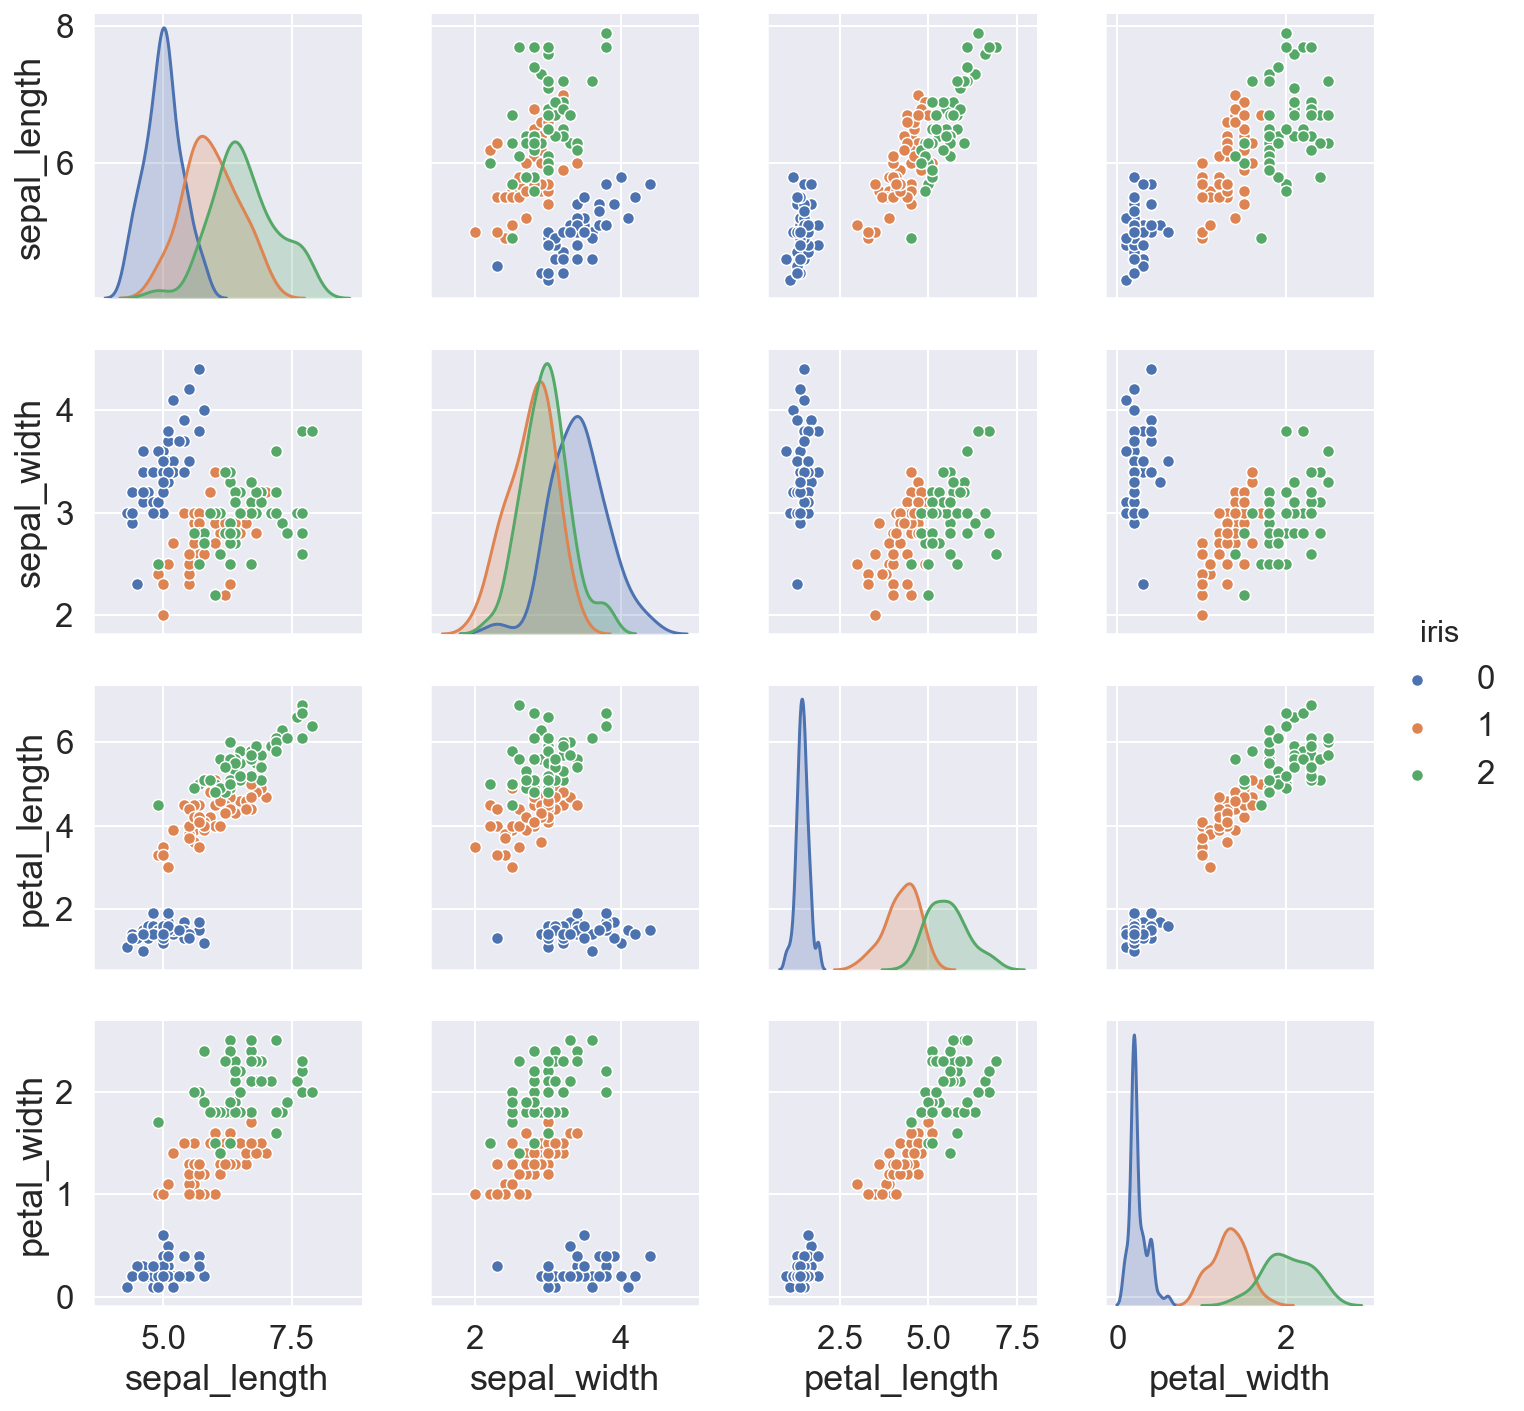

In [14]:
sns.pairplot(X, 
             vars=[col for col in X.columns if col !='iris'], 
             hue='iris', 
             diag_kind='kde')
plt.show()

## Using sklearn's `KNeighborsClassifier` 
---

Let's see how the sklearn KNN classifier performs on our dataset predicting the target class using cross-validation.

Load the KNN classifier with
```python
from sklearn.neighbors import KNeighborsClassifier
```

**We are going to set some arguments when instantiating the model:**
1. **n_neighbors** specifies how many neighbors will vote on the class
2. **weights**: `uniform` weights indicate that all neighbors have the same weight, `distance` gives more weight to closer observations
3. **metric** and **p**: when distance is Minkowski (the default) and p == 2 (the default), _this is equivalent to the euclidean distance metric_

In [15]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

### Create the target vector 

In [16]:
y = X.pop('iris')

### Standardize the predictor matrix

Standardization should be done for the predictors when using a KNN model. Why? 

Remember that KNN finds the nearest neighbors according to a distance metric. If the predictors are left unstandardized, then it is possible that some predictors will have an unfair impact on the distance measure simply because they are on a larger scale than the other variables.

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)

### Calculate the "baseline" accuracy

Before we can evaluate whether our classifier's accuracy is good or bad, we need to know the baseline accuracy.

**The baseline accuracy is the fraction of the majority class.**

It can be determined for example in the following way.

```python
y.value_counts(normalize=True).max()
```

If our strategy was to predict the same class regardless of what are the predictor values, we should predict this majority class to get most of the answers right.

**It is critical that you know your baseline accuracy!**

If your dataset for example had 95 1's and 5 0's, and you got a 95% accuracy using KNN, if you did not look at your baseline accuracy you might conclude that your classifier is doing great. In fact, it's doing no better than chance! The classifier could have simply alway predicted 1s to obtain an accuracy of 0.95.

In [18]:
print(list(y))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [19]:
y.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: iris, dtype: float64

In [20]:
print('baseline:', y.value_counts(normalize=True).max())

baseline: 0.3333333333333333


### Instantiate and fit the kNN model

> The default number of neighbors is 5.

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Xs, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicted labels and probabilities

In [22]:
# obtain the predicted labels
predictions = knn.predict(Xs)
print(np.unique(predictions, return_counts=True))

(array([0, 1, 2]), array([50, 51, 49]))


In [23]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
# obtain the predicted class probabilities for belonging to each class
probs = knn.predict_proba(Xs)
probs[-20:]

array([[0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.6, 0.4],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0.4, 0.6]])

In [25]:
probs.shape

(150, 3)

### The accuracy score

The accuracy measures the fraction of correct predictions we are making. This is the score used by scikit-learn classification models by default. We can calculate it by hand or using scikit-learn.

In [26]:
# by hand
(y == predictions).mean()

0.9533333333333334

In [27]:
# obtain the score from the model object function
knn.score(Xs, y)

0.9533333333333334

In [28]:
# using sklearn's accuracy score function on true and predicted values
from sklearn.metrics import accuracy_score

accuracy_score(y, predictions)

0.9533333333333334

### Cross validate the model

That works just like in regression.

In [29]:
scores = cross_val_score(knn, Xs, y, cv=5)
print(scores)
print(np.mean(scores))

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


In [30]:
y.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Stratified Kfold

The classification algorithm uses Stratified Kfold by default which works slightly different from what we have seen before. It does preserve the order of the data, but keeps the proportions of class labels the same within each Kfold.

In [31]:
skf = StratifiedKFold(n_splits=5)

scores = cross_val_score(knn, Xs, y, cv=skf)
print(scores)
print(np.mean(scores))

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


### Cross-validate the mean accuracy for a KNN model with varying number of neighbors

As you can see the mean cross-validated accuracy is very high with 5 neighbors. 

One neighbor:

In [32]:
# with one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Xs, y)
print(knn.score(Xs, y))
print(np.mean(cross_val_score(knn, Xs, y, cv=5)))

1.0
0.9466666666666665


As many neighbors as observations:

This won't work with cross validation. Why?

In [33]:
knn = KNeighborsClassifier(n_neighbors=len(y))
knn.fit(Xs, y)
print(knn.score(Xs, y))

0.3333333333333333


In [34]:
scores = []
max_k = 121
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(np.mean(cross_val_score(knn, Xs, y, cv=5)))

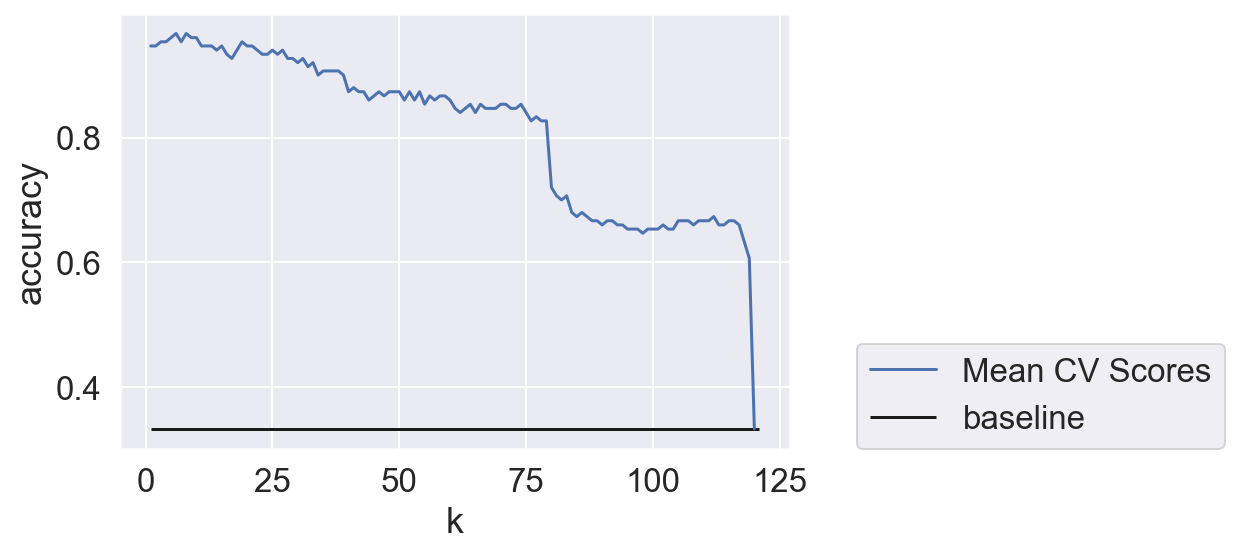

In [35]:
plt.plot(range(1, max_k), scores, label='Mean CV Scores')
plt.hlines(y.value_counts(normalize=True).max(), 1, max_k, label='baseline')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(loc=[1.1, 0])
plt.show()

### How does increasing the number of neighbors impact the bias and variance of your model?

> As the number of neighbors increases, the bias of the model increases and the variance decreases. It is easy to gain the intuition for this by thinking about the extreme cases:

> - With 1 neighbor, the prediction only depends on a single training observation. If we were to change the random sample of data the model is fitted on, this would maximize the likelihood that our prediction varies (high variance, low bias)

> - With neighbors == (number of training observations), the prediction is the same as predicting the majority class. In other words, with maximum neighbors we are guessing the baseline proportion of classes (max bias, low variance). 

## Another look at `StratifiedKfold`

Sklearn's `StratifiedKFold` from the `model_selection` module is imported with

```python
from sklearn.model_selection import StratifiedKFold
```

The `StratifiedKFold` object will return cross-validation _indices_ which you can use to subset your data (in a for loop, for example) that runs the model and tests it. 

This is the **stratified** version of the `KFold` class. Stratification ensures that there are equal proportions of the predicted class in each train-test fold. This is best practice in classification tasks. In this way you can do explicitly what `cross_val_score` does under the hood.

### Create the cross-validation indices using `StratifiedKFold`

`StratifiedKFold` is instantiated with `n_splits` number of train-test pairs desired.

The built-in `.split()` function will take a predictor matrix and target array and return the training and testing indices.

> **Note:** The `split` function will return a python *generator*. This can be iterated, but works differently from a list in that once iterated it will be "empty". You can convert the output to a list using a list comprehension if you need to use the indices multiple times.

In [36]:
skf = StratifiedKFold(n_splits=5)

In [37]:
test_list = [0]*5+[1]*5
test_list

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [38]:
list(skf.split(Xs[:10], test_list))

[(array([1, 2, 3, 4, 6, 7, 8, 9]), array([0, 5])),
 (array([0, 2, 3, 4, 5, 7, 8, 9]), array([1, 6])),
 (array([0, 1, 3, 4, 5, 6, 8, 9]), array([2, 7])),
 (array([0, 1, 2, 4, 5, 6, 7, 9]), array([3, 8])),
 (array([0, 1, 2, 3, 5, 6, 7, 8]), array([4, 9]))]

In [39]:
cv_indices = skf.split(Xs, y)
cv_indices_lists = [[tr, te] for tr, te in cv_indices]

In [40]:
(list(cv_indices_lists)[1][1])

array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119])

In [41]:
cv_indices_lists

[[array([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
          23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
          36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
          49,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
          72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
          85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  50,  51,  52,
          53,  54,  55,  56,  57,  58,  59, 100, 101, 102, 103, 104, 105,
         106, 107, 108, 109])],
 [array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  20,  21,  22,
          23,  24,  25,  26,  27,  28,  29,  30,  31, 

### Write a function to manually perform cross-validation using your stratified indices

Now that we have the indices (row indices for our train-test splits), write a function that will:
- Split the X and y into training and testing subsets
- Fit a KNN classifier on the training set
- Calculate the accuracy of the classifier on the test set
- Store the accuracies for each fold and return them as a list

In [42]:
# Function to crossvalidate accuracy of a knn model acros folds
def accuracy_crossvalidator(X, y, knn, cv_indices):

    # list to store the scores/accuracy of folds
    scores = []

    # iterate through the training and testing folds in cv_indices
    for train_i, test_i in cv_indices:

        # get the current X train & test subsets of X
        X_train = X[train_i, :]
        X_test = X[test_i, :]

        # get the Y train & test subsets of Y
        Y_train = y[train_i]
        Y_test = y[test_i]

        # fit the knn model on the training data
        knn.fit(X_train, Y_train)

        # get the accuracy predicting the testing data
        acc = knn.score(X_test, Y_test)
        scores.append(acc)

        print('Fold accuracy:', acc)

    print('Mean CV accuracy:', np.mean(scores))
    return scores

In [43]:
knn5 = KNeighborsClassifier(n_neighbors=5)
scores = accuracy_crossvalidator(Xs, y, knn5, cv_indices_lists)

Fold accuracy: 0.9666666666666667
Fold accuracy: 0.9666666666666667
Fold accuracy: 0.9333333333333333
Fold accuracy: 0.9333333333333333
Fold accuracy: 1.0
Mean CV accuracy: 0.96


## Additional resources

---


- Scott Foreman-Roe's [breakdown](http://scott.fortmann-roe.com/docs/BiasVariance.html) (required) of the bias-variance tradeoff featuring a discussion of KNN is an excellent read
- A [detailed discussion](https://saravananthirumuruganathan.wordpress.com/2010/05/17/a-detailed-introduction-to-k-nearest-neighbor-knn-algorithm/) of KNN
- A long, applied example of KNN applied to [image classification](http://cs231n.github.io/classification/ )
- If academic breakdowns are your thing, be sure to visit [this](http://me.seekingqed.com/files/intro_KNN.pdf) resource
- Read the SKLearn [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) on implementing KNN
- Choosing the right [algorithm from SKLearn](http://scikit-learn.org/stable/tutorial/machine_learning_map/)
- A deeper dive into [Euclidean distance](http://www.econ.upf.edu/~michael/stanford/maeb4.pdf)